In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib.path import Path
import matplotlib.pyplot as plt

# testing point 

In this script We generate points to mesure. Corners of Blonia:
50°03'45.2"N 19°54'09.1"E
50°03'37.3"N 19°54'03.1"E
50°03'25.1"N 19°54'25.9"E
50°03'33.2"N 19°55'26.0"E

In [11]:
def to_decimal(deg,min,sec):
    return deg + (1/60)*min + (1/3600)*sec 

In [12]:
point_1_y = to_decimal(50,3,45.2)
point_1_x = to_decimal(19,54,9.1)
point_2_y = to_decimal(50,3,37.3)
point_2_x = to_decimal(19,54,3.1)
point_3_y = to_decimal(50,3,25.1)
point_3_x = to_decimal(19,54,25.9)
point_4_y = 50.059240
point_4_x = 19.923921

In [13]:
AD = 1518.1 # m
AB = 243.4  # unprecise dimensions of Blonia
BC = 604.9
CD = 1130.7
#jump_y

In [14]:
left = point_2_x            # making squere that will be used to generate points that will be sorted
right = point_4_x
up = point_1_y
down = point_3_y

In [15]:
jump_x = (left - right)/81  # generating list of longitudes and latitudes, x and y coordinates of points
jump_y = (down - up)/30
list_x = np.array(right)
list_y = np.array(up)
for i in range(1,81):
    list_x = np.append(list_x,right + i*jump_x)
for i in range(1,30):
    list_y = np.append(list_y,up + i*jump_y)


In [16]:
fin = []                    # generating squere gird of points 
for j in range(30):
    for i in range(81):
        fin.append([list_x[i],list_y[j]])

In [17]:
Ax = point_1_x
Ay = point_1_y
Bx = point_2_x
By = point_2_y
Cx = point_3_x
Cy = point_3_y
Dx = 19.923921
Dy = 50.059240
Ey = By
Ex = 50.0637389875082
Dx

19.923921

In [18]:
def sign(p1,p2,p3):
    return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

def PointInTriangle(pt,v1,v2,v3):
    d1 = sign(pt, v1, v2)
    d2 = sign(pt, v2, v3)
    d3 = sign(pt, v3, v1)
    has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
    has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)

    return not(has_neg and has_pos)


In [19]:
triangle = [[Ax,Ay],[Bx,By],[Cx,Cy],[Dx,Dy],[Ex,Ey]]
last_one = []
for i in range(len(fin)):
    InTriangle = PointInTriangle(fin[i], triangle[0], triangle[1], triangle[2])
    if InTriangle:
        last_one.append(fin[i])

for i in range(len(fin)):
    InTriangle = PointInTriangle(fin[i], triangle[0], triangle[3], triangle[2])
    if InTriangle:
        last_one.append(fin[i])
last_one

[[19.902569251028805, 50.06236944444444],
 [19.902569251028805, 50.06218333333333],
 [19.90228456104252, 50.06218333333333],
 [19.90285394101509, 50.061997222222224],
 [19.902569251028805, 50.061997222222224],
 [19.90228456104252, 50.061997222222224],
 [19.90313863100137, 50.06181111111111],
 [19.90285394101509, 50.06181111111111],
 [19.902569251028805, 50.06181111111111],
 [19.90228456104252, 50.06181111111111],
 [19.90199987105624, 50.06181111111111],
 [19.90313863100137, 50.061625],
 [19.90285394101509, 50.061625],
 [19.902569251028805, 50.061625],
 [19.90228456104252, 50.061625],
 [19.90199987105624, 50.061625],
 [19.903423320987653, 50.06143888888889],
 [19.90313863100137, 50.06143888888889],
 [19.90285394101509, 50.06143888888889],
 [19.902569251028805, 50.06143888888889],
 [19.90228456104252, 50.06143888888889],
 [19.90199987105624, 50.06143888888889],
 [19.901715181069957, 50.06143888888889],
 [19.903423320987653, 50.061252777777774],
 [19.90313863100137, 50.061252777777774],
 

In [20]:

NumFinn = np.array(last_one)
# dictionary of lists  
dict = {'latitude': NumFinn.T[0], 'longitude': NumFinn.T[1]}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('PoinsBlona_part_two.csv') 

In [21]:
part_two = np.array(last_one)
part_two.T[0]

array([19.90256925, 19.90256925, 19.90228456, ..., 19.90769367,
       19.90740898, 19.90712429])

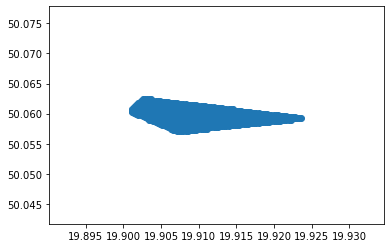

In [22]:

plt.scatter(part_two.T[0], part_two.T[1])

In [23]:
BBox = (19.899, 19.9255,      
         50.0562, 50.0637)


In [24]:
Blonia = plt.imread('map(1).png')

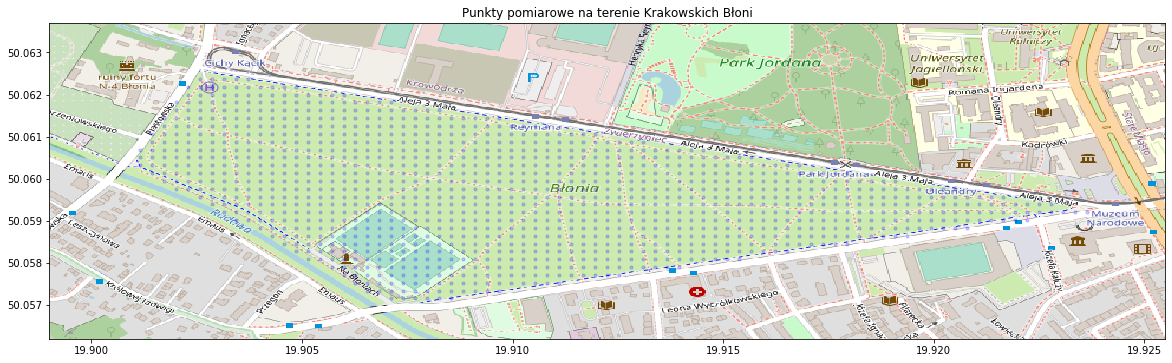

In [25]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(part_two.T[0], part_two.T[1], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Punkty pomiarowe na terenie Krakowskich Błoni')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal')

In [29]:
import csv
file = open('1641591959435.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
rows = []
for row in csvreader:
        rows.append(row)
file.close()

In [31]:

longitude = []
latitude = []
vertical = []
horizontal = []
test_lon = []
test_lat = []
for i in range(len(rows)-3):
    longitude.append(rows[i][6])
    latitude.append(rows[i][7])
    vertical.append(rows[i][8])
    horizontal.append(rows[i][10])
    test_lon.append(rows[i][4])
    test_lat.append(rows[i][5])

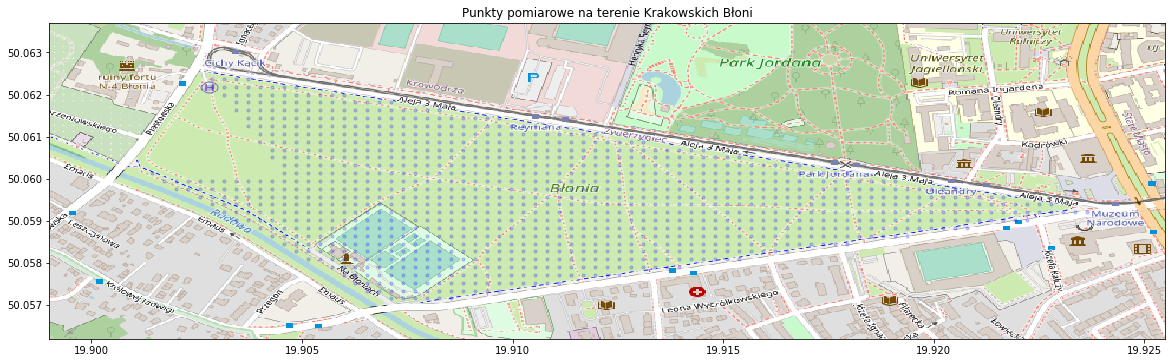

In [41]:
not_mesured=part_two[92:]
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(not_mesured.T[0], not_mesured.T[1], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Punkty pomiarowe na terenie Krakowskich Błoni')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal')

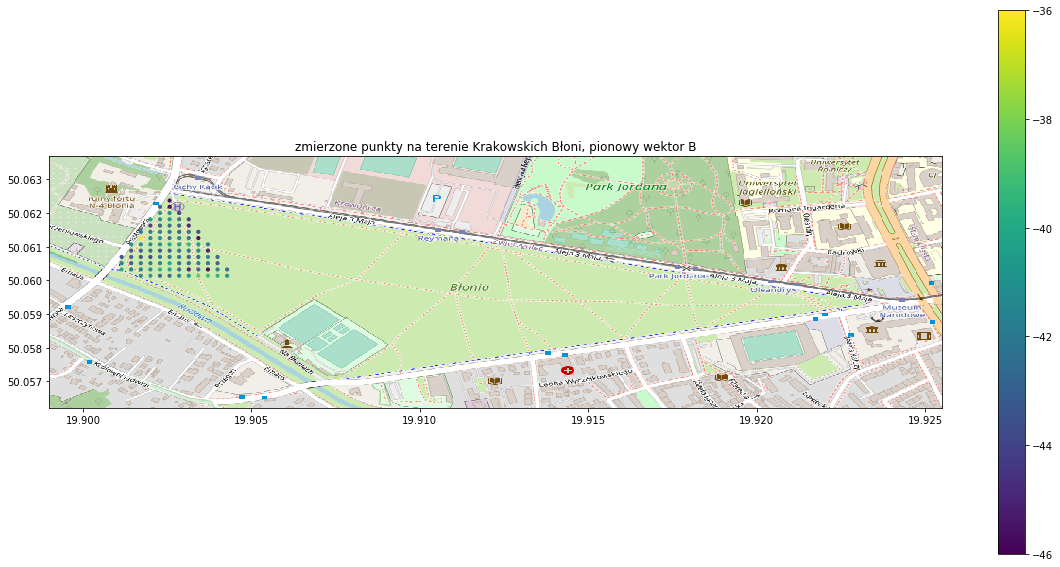

In [74]:
colors = np.array([float(i) for i in vertical])*-0.01
not_mesured=part_two[:92]
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(not_mesured.T[0], not_mesured.T[1], zorder=1, alpha= 0.9, c=colors, s=10)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, pionowy wektor B')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal',vmin=-46,vmax=-36)
fig.colorbar(im,ax=ax)

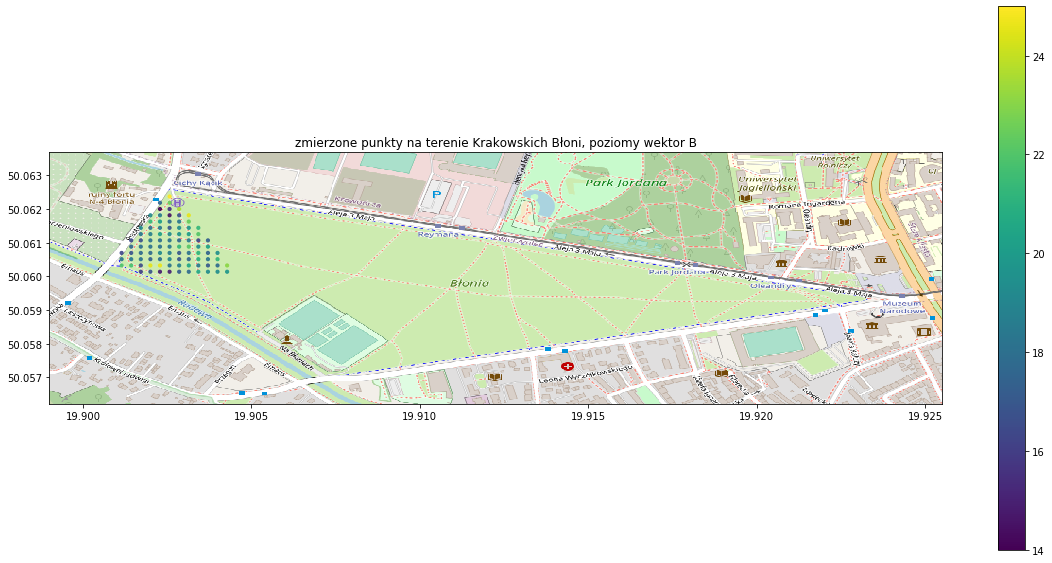

In [71]:
colors = np.array([float(i) for i in horizontal])*0.01
not_mesured=part_two[:92]
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(not_mesured.T[0], not_mesured.T[1], zorder=1, alpha= 0.9, c=colors, s=10)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, poziomy wektor B')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal', vmin=14,vmax=25)
fig.colorbar(im,ax=ax)


In [72]:
vertical

['-38.06296',
 '-38.23963',
 '-42.13811',
 '-40.30558',
 '-45.11718',
 '-45.59156',
 '-40.31277',
 '-43.92171',
 '-45.29980',
 '-44.70820',
 '-45.94885',
 '-39.02266',
 '-42.25079',
 '-42.99320',
 '-42.10041',
 '-40.12128',
 '-41.11955',
 '-42.77398',
 '-42.10285',
 '-43.20416',
 '-43.69793',
 '-43.61545',
 '-43.47760',
 '-37.91244',
 '-43.12460',
 '-44.23913',
 '-42.89742',
 '-45.18446',
 '-44.26431',
 '-53.08064',
 '-43.66489',
 '-45.90101',
 '-47.59713',
 '-45.67605',
 '-46.70987',
 '-45.03222',
 '-44.89514',
 '-44.56186',
 '-44.49644',
 '-38.96872',
 '-44.48885',
 '-42.93505',
 '-43.12303',
 '-42.17521',
 '-41.50940',
 '-42.68923',
 '-41.97228',
 '-42.05605',
 '-42.30310',
 '-44.51402',
 '-42.24989',
 '-41.96507',
 '-43.45372',
 '-43.39161',
 '-43.37116',
 '-40.50732',
 '-41.42383',
 '-41.88057',
 '-41.14021',
 '-42.19261',
 '-43.33621',
 '-43.62084',
 '-42.54283',
 '-42.63569',
 '-46.50801',
 '-44.11207',
 '-43.69646',
 '-43.21479',
 '-41.65268',
 '-43.71019',
 '-42.86879',
 '-44.